In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

from gensim.models import Word2Vec
from gensim import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
base_LM_path = "/Users/khosseini/myJobs/ATI/Projects/2019/Living-with-Machines-code/language-lab-mro/lexicon_expansion/interactive_expansion/models/all_books/w2v_005/w2v_words.model"
high_corr_LM_path = "./LMs/w2v_005_EM_corr_qual_1_2_00000.model"
high_ocr_LM_path = "./LMs/w2v_005_EM_ocr_qual_1_2_00000.model"
low_corr_LM_path = "./LMs/w2v_005_EM_corr_qual_3_4.model" 
low_ocr_LM_path = "./LMs/w2v_005_EM_ocr_qual_3_4.model"

In [3]:
base_LM = Word2Vec.load(base_LM_path)
high_corr_LM = Word2Vec.load(high_corr_LM_path)
high_ocr_LM = Word2Vec.load(high_ocr_LM_path)
low_corr_LM = Word2Vec.load(low_corr_LM_path)
low_ocr_LM = Word2Vec.load(low_ocr_LM_path)

2019-11-21 11:19:57,648 : INFO : loading Word2Vec object from /Users/khosseini/myJobs/ATI/Projects/2019/Living-with-Machines-code/language-lab-mro/lexicon_expansion/interactive_expansion/models/all_books/w2v_005/w2v_words.model
2019-11-21 11:19:58,665 : INFO : loading wv recursively from /Users/khosseini/myJobs/ATI/Projects/2019/Living-with-Machines-code/language-lab-mro/lexicon_expansion/interactive_expansion/models/all_books/w2v_005/w2v_words.model.wv.* with mmap=None
2019-11-21 11:19:58,666 : INFO : loading vectors from /Users/khosseini/myJobs/ATI/Projects/2019/Living-with-Machines-code/language-lab-mro/lexicon_expansion/interactive_expansion/models/all_books/w2v_005/w2v_words.model.wv.vectors.npy with mmap=None
2019-11-21 11:19:58,961 : INFO : setting ignored attribute vectors_norm to None
2019-11-21 11:19:58,962 : INFO : loading vocabulary recursively from /Users/khosseini/myJobs/ATI/Projects/2019/Living-with-Machines-code/language-lab-mro/lexicon_expansion/interactive_expansion/m

In [29]:
def display_pca_scatterplot(models, seed_word=None, sample=0):
    plt.figure(figsize=(12,8))
    #import seaborn as sns
    #current_palette = sns.color_palette()
    colors = ['k', 'gray', 'r', 'orange']
    for i, model in enumerate(models):
        words = np.array(model.wv.most_similar(seed_word, topn=2))[:, 0]
        words = np.append(words, seed_word)
        """
        if words == None:
            if sample > 0:
                words = np.random.choice(list(model.vocab.keys()), sample)
            else:
                words = [ word for word in model.vocab ]
        """

        word_vectors = np.array([model[w] for w in words])

        twodim = PCA().fit_transform(word_vectors)[:,:2]

        plt.scatter(twodim[:,0], twodim[:,1], edgecolors=colors[i], c=colors[i], s=100)
        for word, (x,y) in zip(words, twodim):
            plt.text(x+0.05, y+0.05, word, size=20)
        #plt.xlim(-2.5, 3.5)
        #plt.ylim(-1.7, 2)
    plt.grid()
    plt.xticks(size=15)
    plt.yticks(size=15)

/Users/khosseini/anaconda3/envs/py37torch/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/khosseini/anaconda3/envs/py37torch/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/khosseini/anaconda3/envs/py37torch/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/Users/khosseini/anaconda3/envs/py37torch/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


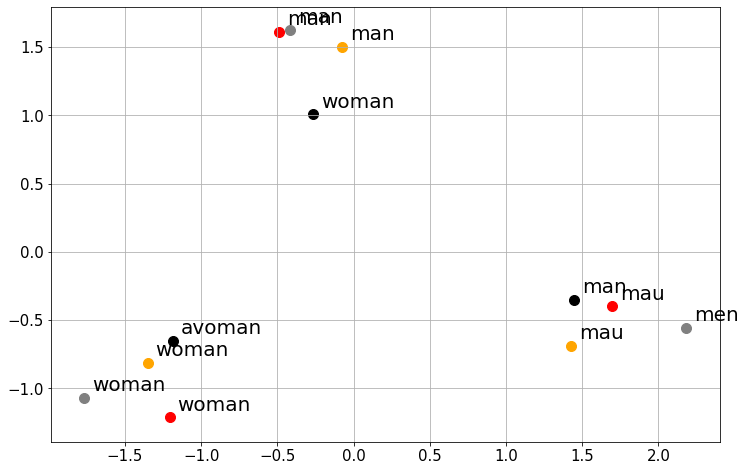

In [33]:
display_pca_scatterplot([base_LM, high_corr_LM, high_ocr_LM, low_ocr_LM], 
                        'man'
                       )